In [453]:
# Modified from an R script found on Kaggle - https://www.kaggle.com/code/mathan/factor-analysis-on-match-statistics

In [454]:
# Imports 
import numpy as np
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler


In [455]:
# Load data
dataframe = pd.read_csv('FIFA_2018_Statistics.csv')

In [456]:
# Preprocess
dataframe = dataframe.fillna(0) # Remove NA values
dataframe = dataframe.select_dtypes(include=[np.number]) # Remove string columns

#Normalise data
scaler = StandardScaler() # Z score normalisation z = (x - mu) / standard_deviation
cols_to_normalize = dataframe.columns
dataframe[cols_to_normalize] = scaler.fit_transform(dataframe[cols_to_normalize])

# # Compute correlation matrix
corrMat = dataframe.corr() # Compute correlation matrix

In [457]:
# Normalise data

In [458]:
"""Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate
at all using the observed correlation matrix against the identity matrix. If the 
test found statistically insignificant, you should not employ a factor analysis. Set to 0.0005 as threshold 
may need to check for other datasets"""

corrMat
chi_square_value, p_value = calculate_bartlett_sphericity(corrMat)
assert p_value < 0.05, "Bartlett's test of sphericity failed. You should not employ a factor analysis."
print("Barlett test passed: P-value =", p_value)

Barlett test passed: P-value = 1.116051227105601e-75


In [459]:
"""The Kaiser-Meyer-Olkin (KMO) test is a measure of sampling adequacy for factor analysis. 
It is used to determine whether the data is suitable for factor analysis. The KMO value ranges from 0 to 1,
with values closer to 1 indicating that the data is more suitable for factor analysis. 
In general, a KMO value above 0.6 is considered acceptable, and a value above 0.8 is considered good."""

# calculate KMO value
kmo_all, kmo_model = calculate_kmo(dataframe)

# print KMO value
print("The overall model score is:", kmo_model)
 
# print KMO value
variablesToKeep = []
for index, variable in enumerate(corrMat.columns):
    if kmo_all[index] > 0.6:
        print('KMO value for', variable, ': ', kmo_all[index])
        variablesToKeep.append(variable)

print("\n")
print(f"There are {len(variablesToKeep)} variables with KMO > 0.6")
        
# Remove variables with KMO < 0.6
OGdataframe = dataframe
dataframe = dataframe[variablesToKeep]
corrMat = dataframe.corr() # Compute updated correlation matrix

The overall model score is: 0.5629159809281383
KMO value for Goal Scored :  0.6208658092541539
KMO value for Ball Possession % :  0.7181889850965758
KMO value for Corners :  0.9292808095419527
KMO value for Saves :  0.7899159613925419
KMO value for Pass Accuracy % :  0.8388019385890987
KMO value for Passes :  0.7056119654851569
KMO value for Fouls Committed :  0.7164791242193372


There are 7 variables with KMO > 0.6


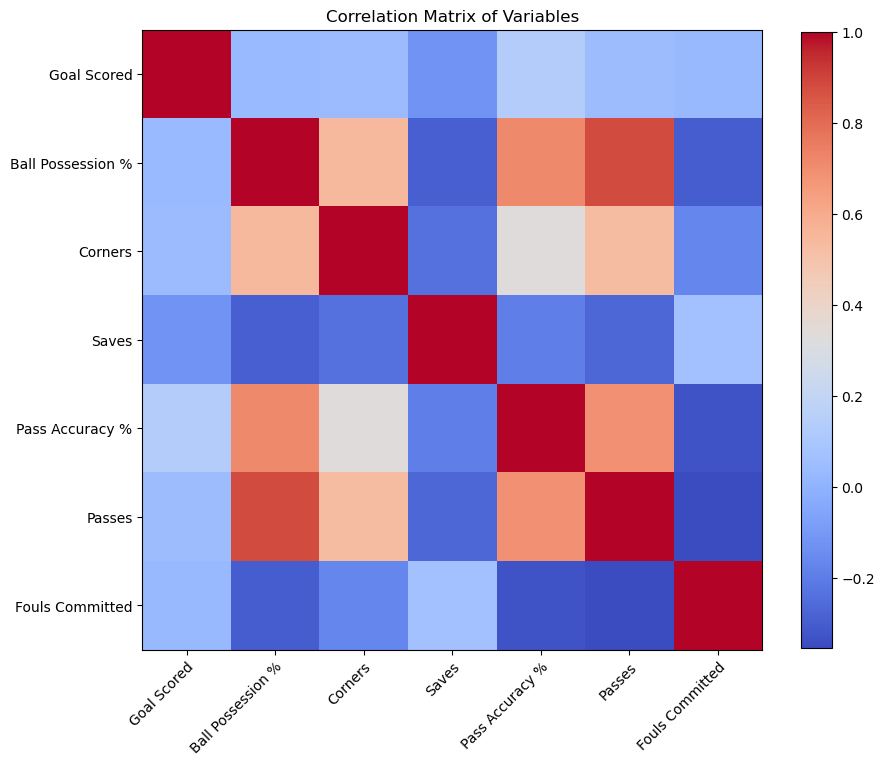

In [460]:
# Plot the correlation matrix of remaining variables

fig, axs = plt.subplots(figsize=(10, 20))
im = axs.imshow(corrMat, cmap='coolwarm')

axs.set_xticks(np.arange(len(corrMat.columns)))
axs.set_yticks(np.arange(len(corrMat.columns)))
axs.set_xticklabels(corrMat.columns)
axs.set_yticklabels(corrMat.columns)

# rotate the tick labels and set their alignment.
plt.setp(axs.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.title("Correlation Matrix of Variables")

plt.colorbar(im, shrink = 0.4)

plt.show()

You can see that there are a few main variables here that correlate. Corners, passes, Pass Accuracy and Ball possession. So let's try a model with 4 factors. 

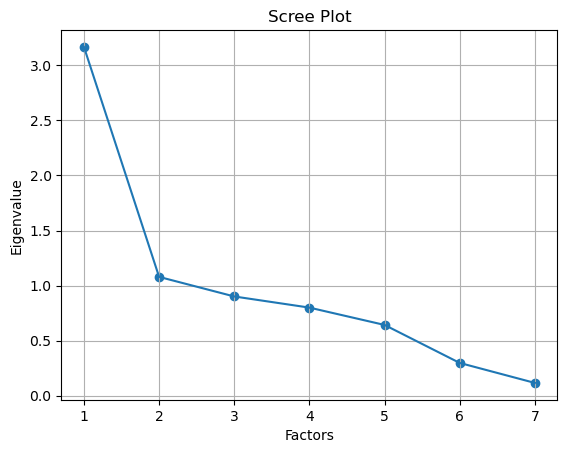

Looks like there are 2 factors involved here with eigenvalue > 1


In [461]:
fa = FactorAnalyzer()
fa.fit(dataframe)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

plt.scatter(range(1,dataframe.shape[1]+1), eigen_values)
plt.plot(range(1,dataframe.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

print ("Looks like there are 2 factors involved here with eigenvalue > 1")

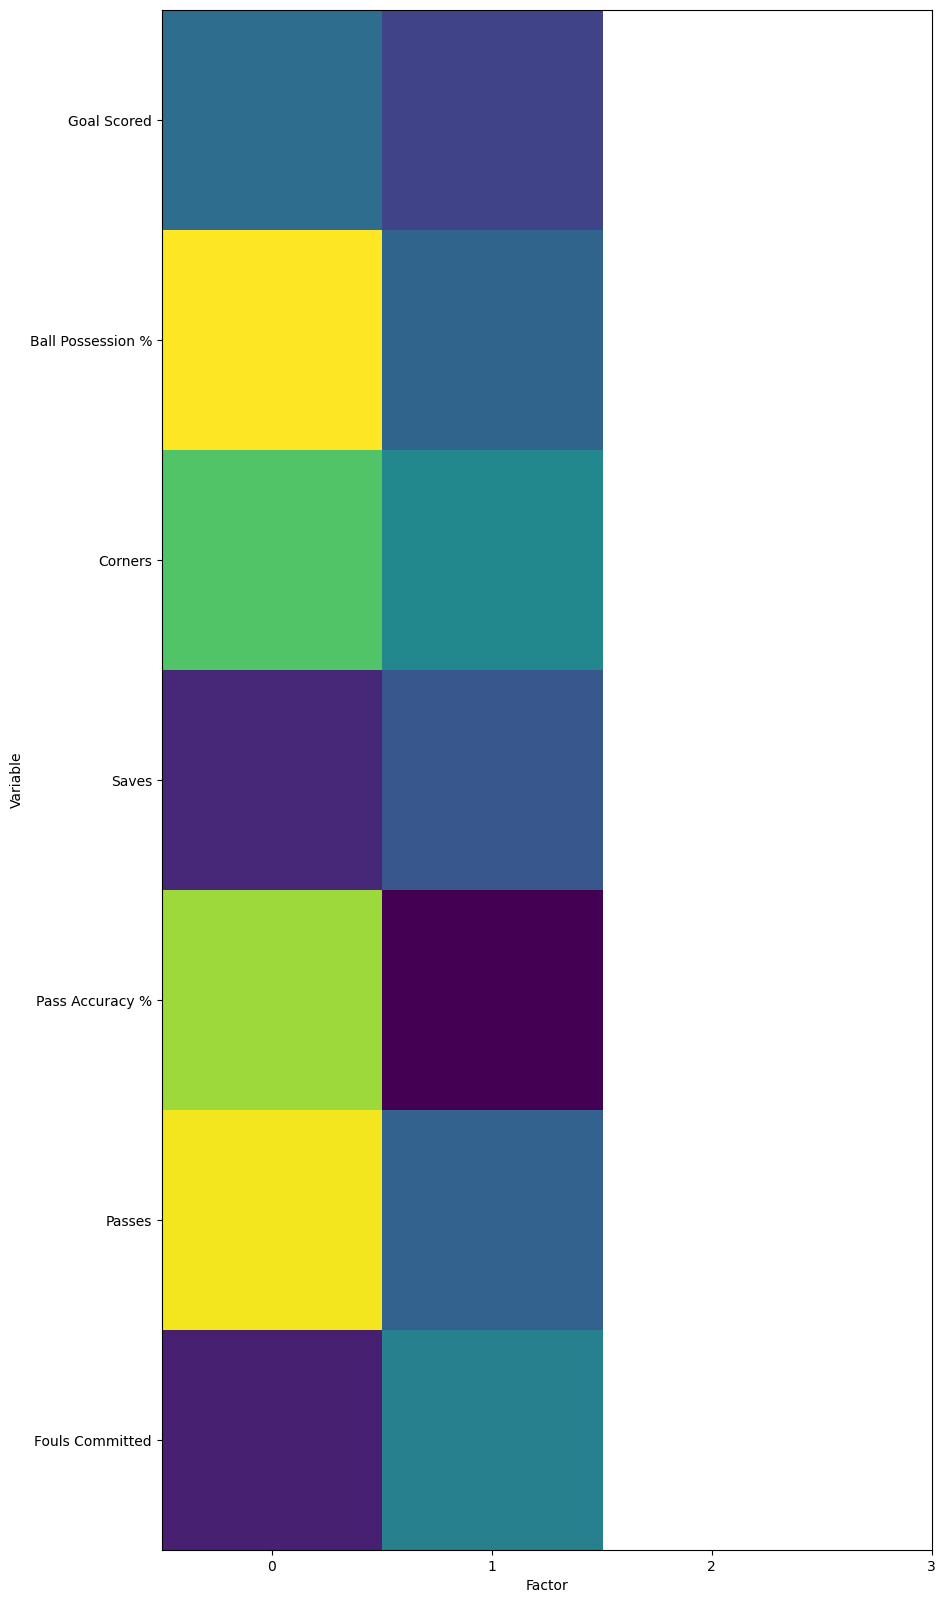

In [462]:
# FA Parameters
numLatents = 2
fa = FactorAnalysis(n_components=numLatents, max_iter = 10000, rotation="varimax")
fa.fit(dataframe)
fa.components_

fig, axs = plt.subplots(figsize=(10, 20))
# vmax = np.abs(fa.components_).max()

axs.imshow(fa.components_.T)

list = dataframe.columns
axs.set_yticks(np.arange(len(list)))
axs.set_yticklabels(list)
axs.set_ylabel('Variable')

axs.set_xticks([0, 1, 2 ,3])
axs.set_xlabel('Factor')

plt.show()

# fa.fit(dataframe)

# W = fa.components_
# Z = fa.transform(dataframe)


In [463]:
# fig, axs = plt.subplots(figsize=(10, 20))
# axs.imshow(W.T, interpolation='none')
# axs.set_ylabel('Variable')
# axs.set_xlabel('Factor')
# plt.show()